In [ ]:
#importing the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
#loading the dataset
df = pd.read_csv('/content/customer_churn.csv')

In [ ]:
#checking the columns
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Card Type,Point Earned
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1,1,2,DIAMOND,464
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,1,3,DIAMOND,456
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,1,3,DIAMOND,377
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0,0,5,GOLD,350
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,0,5,GOLD,425


In [ ]:
#checking the shape of the data set
df.shape

(10000, 18)

# Data Preprocessing and Cleaning


In [ ]:
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Point Earned
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203800,0.204400,3.013800,606.515100
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402842,0.403283,1.405919,225.924839
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000,0.000000,1.000000,119.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000,0.000000,2.000000,410.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000,0.000000,3.000000,605.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000,0.000000,4.000000,801.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000,1.000000,5.000000,1000.000000


In [ ]:
#Dropping unecessary columns
df = df.drop(['RowNumber','CustomerId','Surname'], axis=1)
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Card Type,Point Earned
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1,1,2,DIAMOND,464
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,1,3,DIAMOND,456
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,1,3,DIAMOND,377
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0,0,5,GOLD,350
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,0,5,GOLD,425


In [ ]:
#Checking missing values
df.isnull().sum()

,0
CreditScore,0
Geography,0
Gender,0
Age,0
Tenure,0
Balance,0
NumOfProducts,0
HasCrCard,0
IsActiveMember,0
EstimatedSalary,0


In [ ]:
df.dtypes

,0
CreditScore,int64
Geography,object
Gender,object
Age,int64
Tenure,int64
Balance,float64
NumOfProducts,int64
HasCrCard,int64
IsActiveMember,int64
EstimatedSalary,float64


In [ ]:
#Checking for duplicate values
df.duplicated().sum()

np.int64(0)

In [ ]:
#renaming column names
df.rename(columns={'Exited':'Churn'}, inplace =True)

df.describe()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Churn,Complain,Satisfaction Score,Point Earned
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203800,0.204400,3.013800,606.515100
std,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402842,0.403283,1.405919,225.924839
min,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000,0.000000,1.000000,119.000000
25%,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000,0.000000,2.000000,410.000000
50%,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000,0.000000,3.000000,605.000000
75%,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000,0.000000,4.000000,801.000000
max,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000,1.000000,5.000000,1000.000000


# Exploratory Data Analysis

In the exploratory data analysis , I will begin with univariate analysis to understand and visualize the distribution of the data , then I will explore the relationship between the independent and the target variable.I will aslo check the correlation between the variables.

Pie Chart for Customer Churn

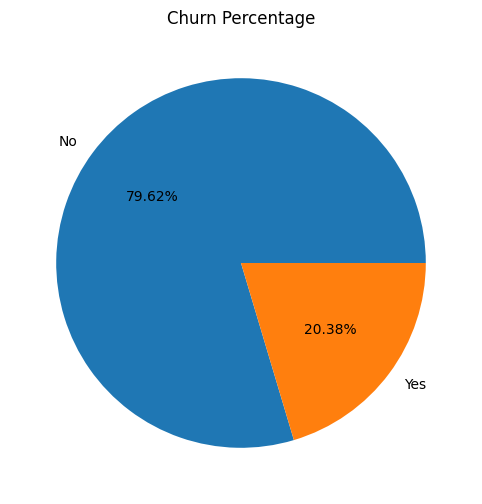

In [ ]:
#pie chart for customer churn
plt.figure(figsize=(10,6))
plt.pie(df['Churn'].value_counts(),labels=['No','Yes'],autopct='%1.2f%%')
plt.title('Churn Percentage')
plt.show()

From the above pie chart , It is clearly visible that the majority of the customers are still using the services with only 20% of them churning

Gender

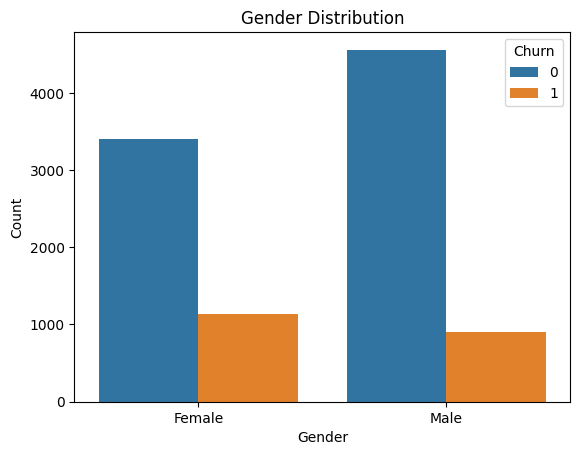

In [ ]:
#gender and customer churn
sns.countplot(x = 'Gender', data = df, hue = 'Churn')
plt.title('Gender Distribution')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

Majority of the customers are males as shown in the above graph. But regarding the churn , we can observe that females have tendency to churn as compared to males.However the churn count for both the gender does not show much difference.

Age distribution

<Axes: xlabel='Age', ylabel='Count'>

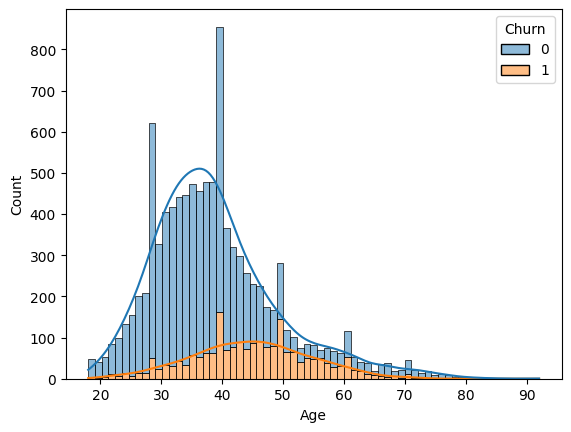

In [ ]:
#histogram for age distribution
sns.histplot(data=df, x="Age", hue="Churn", multiple="stack",kde=True)

The histogram visualizes the age distribution and churn count of the customers.Majority of the customers are in the age group of 30 - 40. However the churn count is highest for the customers of age 40 and 50 .In addition to that customers from age group 20-25 years old count for the lowest churn count. Therefore, age plays a significant role in customer churn, where late adults are more likely to churn as compared to young adults with minimal churn count.


Credit Score

<Axes: xlabel='Churn', ylabel='CreditScore'>

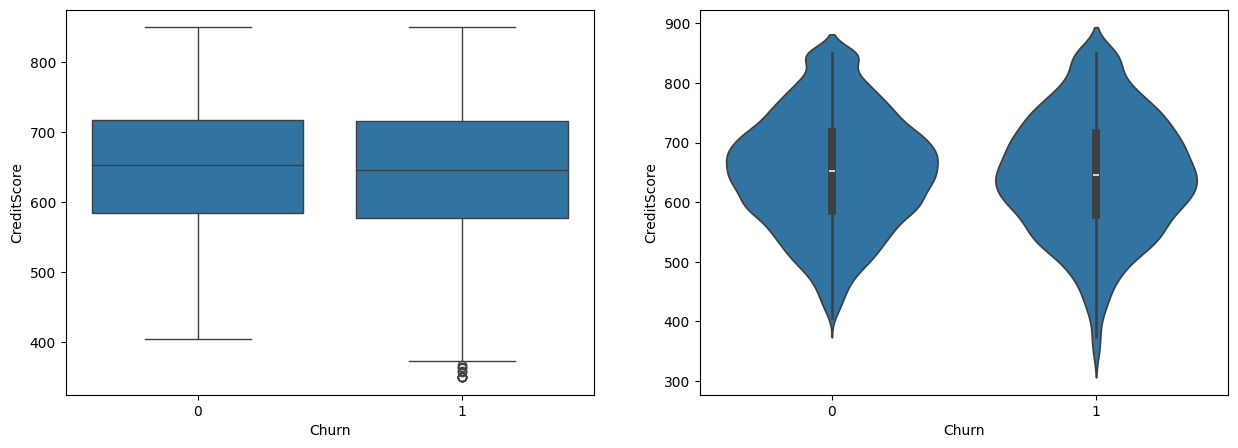

In [ ]:
fig, ax = plt.subplots(1,2,figsize=(15, 5))
sns.boxplot(x="Churn", y="CreditScore", data=df, ax=ax[0] )
sns.violinplot(x="Churn", y="CreditScore", data=df, ax=ax[1])

Based on the boxplot and violin plot, customers who leave and customers who stay have very similar credit scores. Their average scores are the same, and the overall shape of their distributions is identical. Although a small number of people who left had low scores, this is not a common pattern. In general, we cannot use credit score to tell if a customer is likely to churn.

Geography

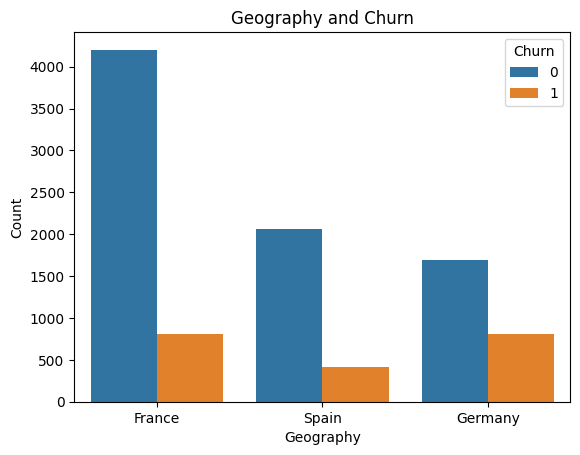

In [ ]:
sns.countplot(x = 'Geography', hue = 'Churn', data = df)
plt.title('Geography and Churn')
plt.xlabel('Geography')
plt.ylabel('Count')
plt.show()

The graph shows that majority of the customers are from france followed by spain and germany. However, in contrast to Germany has slightly higher number of customer churn than France followed by spain.Hence we can infer that German customers are most likely to churn than other two countries

Tenure

<Axes: xlabel='Tenure', ylabel='count'>

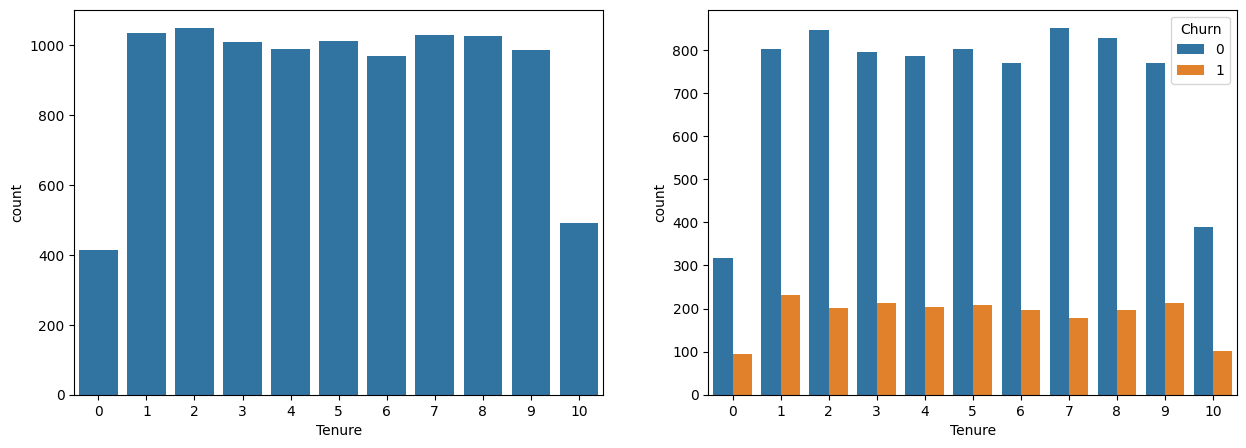

In [ ]:
fig,ax = plt.subplots(1,2,figsize=(15,5))
sns.countplot(x='Tenure', data=df,ax=ax[0])
sns.countplot(x='Tenure', hue='Churn', data=df,ax=ax[1])

Tensure refers to the time (in years) that a customer has been a client of the bank.Customer tenure shows a clear inverse relationship with churn. While the majority of clients have tenures between 1-9 years, churn is concentrated within this group, peaking among newer customers (1-year tenure). In contrast, customers with over nine years of tenure demonstrate significantly higher loyalty, contributing the least to churn rates. This indicates that customer stability increases substantially with longer tenure

Bank Balance

<Axes: xlabel='Balance', ylabel='Count'>

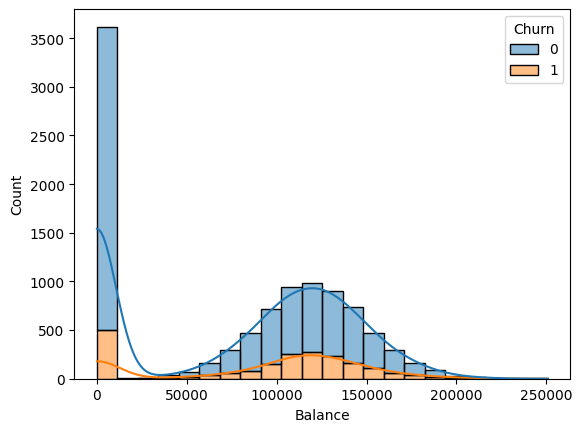

In [ ]:
sns.histplot(data=df, x="Balance", hue="Churn", multiple="stack",kde=True)

A huge number of customers have bank balance zero which also led them to churn .However, customer having bank balance between 100000 to 150000 are more likely to leave the bank after the customers with zero bank balance.

Number of products purchased

<Axes: xlabel='NumOfProducts', ylabel='count'>

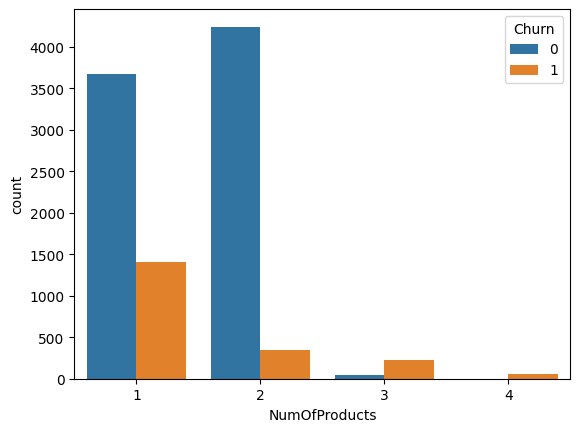

In [ ]:
sns.countplot(x='NumOfProducts', hue='Churn', data=df)

The number of products a customer holds is a strong indicator of churn risk. While customers with 1 or 2 products are the most numerous and show low churn rates, those with 3 or 4 products exhibit a significantly higher propensity to leave. This counter-intuitive trend suggests that owning more products does not necessarily guarantee loyalty and may even signal dissatisfaction

Customer with/without credit card

<Axes: xlabel='HasCrCard', ylabel='count'>

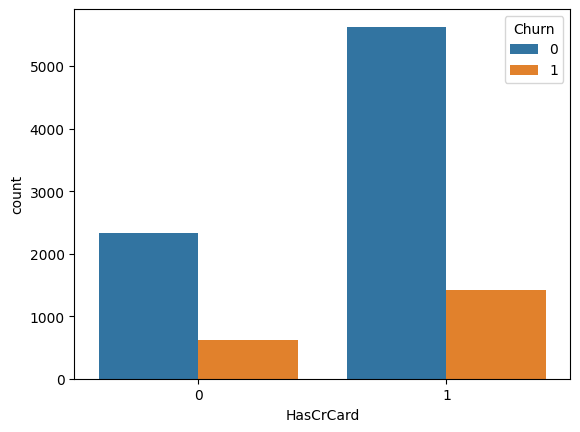

In [ ]:
sns.countplot(x='HasCrCard', hue='Churn', data=df)

Most customers has credit cards who are also likely to churn as compared to the customers without credit cards.

Customer Card Type

<Axes: xlabel='Card Type', ylabel='count'>

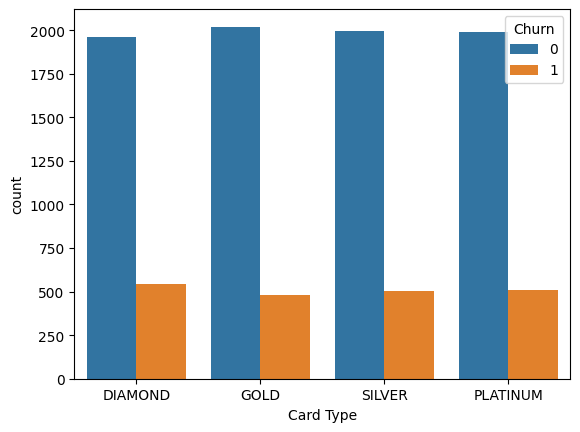

In [ ]:
sns.countplot(x = 'Card Type', hue = 'Churn', data = df)

From the graph , all the card type has similar distribution.Hence the card type is not a good indicator for churn risk

Active Member

<Axes: xlabel='IsActiveMember', ylabel='count'>

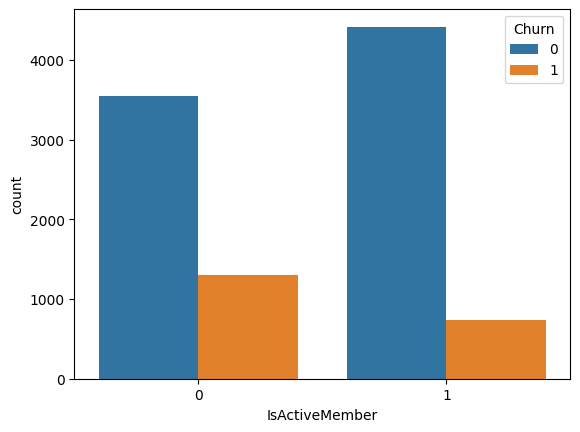

In [ ]:
sns.countplot(x='IsActiveMember', hue='Churn', data=df)

Active members contribute to the majority of the customers and are less likey to churn because of the satisfaction from the bank services.As expected non active members churn the most.

Estimated Salary of Customers

<Axes: xlabel='EstimatedSalary', ylabel='Count'>

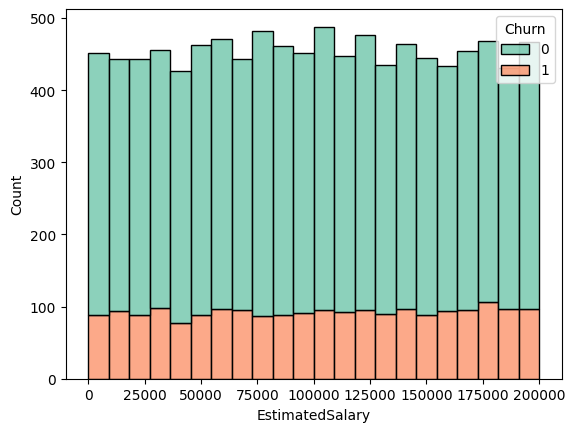

In [ ]:
sns.histplot(data=df,x='EstimatedSalary',hue='Churn',multiple='stack',palette='Set2')

This graph shows the distribution of the estimated salary of the customers along with the churn count. On the whole the there is no definite pattern in the salary distribution of the customers who churned and who didn't. Therefore estimated salary is not a good predictor of churn.

Customer Complain

<Axes: xlabel='Complain', ylabel='count'>

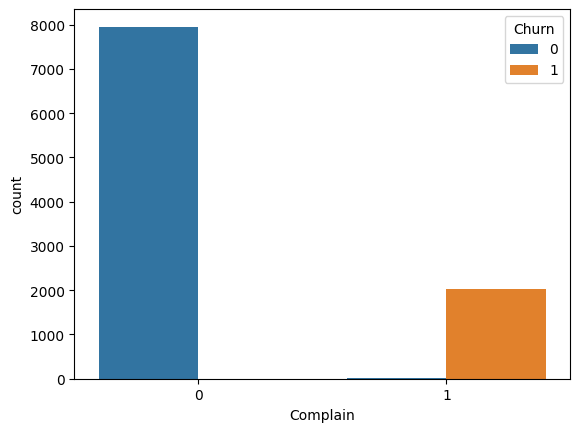

In [ ]:
sns.countplot(x='Complain', hue='Churn', data=df)

A huge number of customers has no complains and do not churn and customer who complain definitely churn

Customer Satisfaction Score

<Axes: xlabel='Satisfaction Score', ylabel='count'>

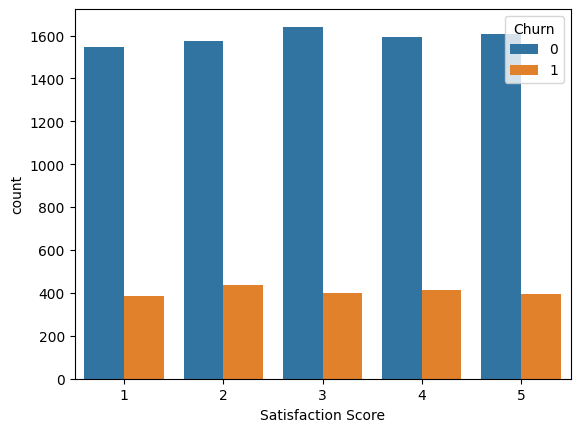

In [ ]:
sns.countplot(x='Satisfaction Score', hue='Churn', data=df)


Points Earned

<Axes: xlabel='Point Earned', ylabel='Count'>

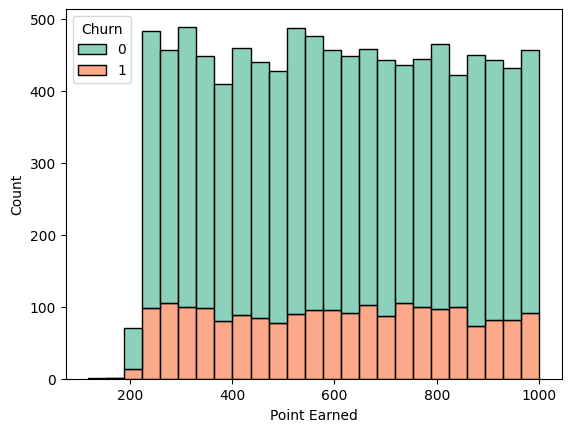

In [ ]:
sns.histplot(data=df,x='Point Earned',hue='Churn',multiple='stack',palette='Set2')

# Data Preprocessing 2

Label encoding the variable

In [ ]:
#label encoding the categorical variables
variables = ['Geography','Gender','Card Type']
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
for i in variables:
    le.fit(df[i].unique())
    df[i]=le.transform(df[i])
    print(i,df[i].unique())

Geography [0 2 1]
Gender [0 1]
Card Type [0 1 3 2]


Normalization

In [ ]:
#normalizing the continuous variables
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df[['CreditScore','Balance','EstimatedSalary']] = scaler.fit_transform(df[['CreditScore','Balance','EstimatedSalary']])

In [ ]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Churn,Complain,Satisfaction Score,Card Type,Point Earned
0,-0.326221,0,0,42,2,-1.225848,1,1,1,0.021886,1,1,2,0,464
1,-0.440036,2,0,41,1,0.117350,1,0,1,0.216534,0,1,3,0,456
2,-1.536794,0,0,42,8,1.333053,3,1,0,0.240687,1,1,3,0,377
3,0.501521,0,0,39,1,-1.225848,2,0,0,-0.108918,0,0,5,1,350
4,2.063884,2,0,43,2,0.785728,1,1,1,-0.365276,0,0,5,1,425


Correlation Matrix Heatmap

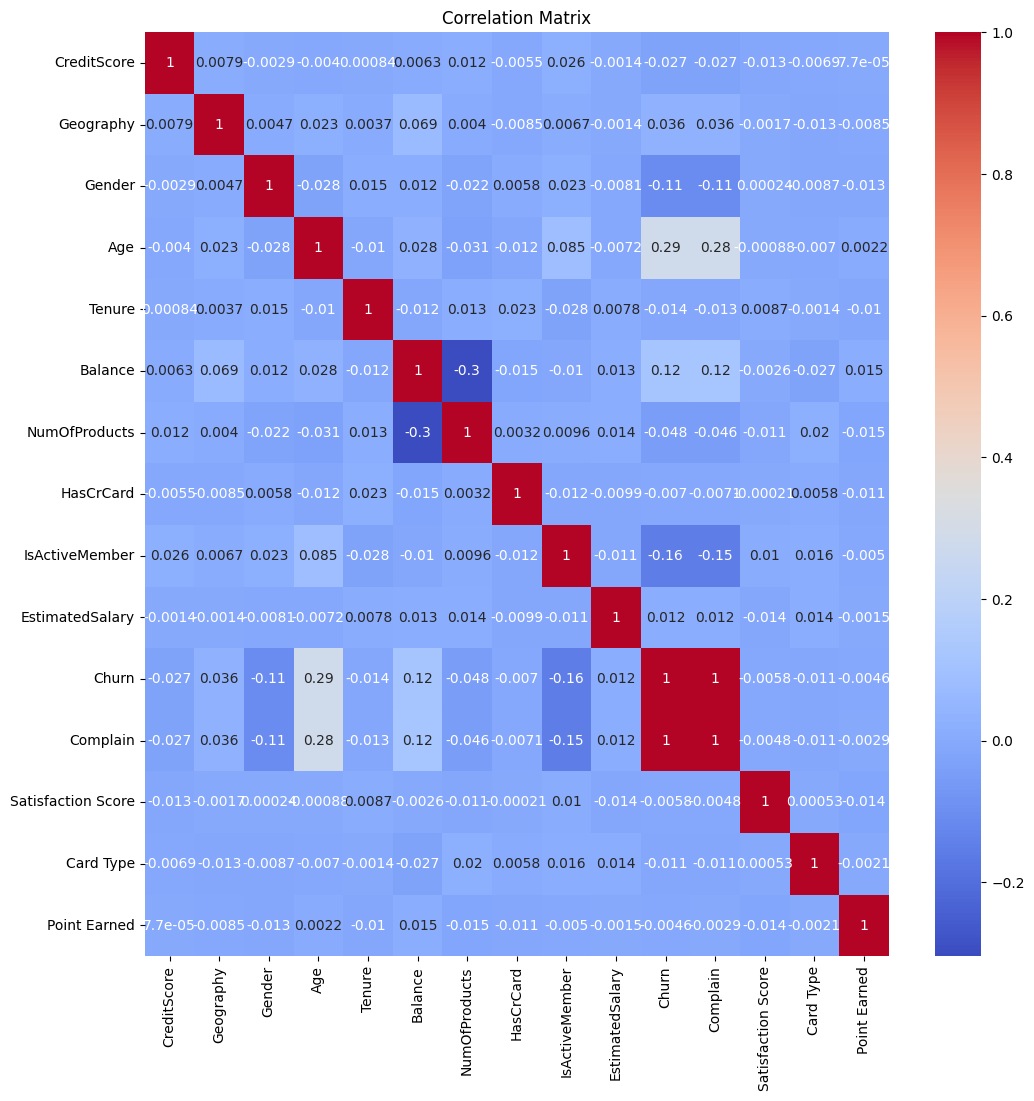

In [ ]:
plt.figure(figsize=(12,12))
sns.heatmap(df.corr(),annot=True,cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

There is no significant correlation between the variables except for complain and churn.

Statistical Test

In [ ]:
#chi-square test for churn and complain
from scipy.stats import chi2_contingency

#contigency table
contingency = pd.crosstab(df['Complain'], df['Churn'])
print(contingency)

Churn        0     1
Complain            
0         7952     4
1           10  2034


Since the correlation map showed a significant relation between complain and churn so conducted a statistical chi-square test to verify it

In [ ]:
#chi-square test
chi2, p, dof, expected = chi2_contingency(contingency)
print("Chi2 Statistic:", chi2)
print("Degrees of Freedom:", dof)
print("p-value:", p)

Chi2 Statistic: 9907.907035880155
Degrees of Freedom: 1
p-value: 0.0


# **Modelling**

## Churn Prediction

Xgboost model was used to predict the churn prediction.

In [ ]:
pip install xgboost

Test -Train Split

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
#Splitting features and target
X = df.drop(columns=['Churn','Complain'])
y = df['Churn']

In [ ]:
#train-test-split
X_train,X_test,y_train,y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y )

Building and Training xgBoost to predict Churn

In [ ]:
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

# Initializing model
xgb_model = XGBClassifier(
    n_estimators=300,
    learning_rate=0.05,
    max_depth=5,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42,
    eval_metric='logloss'
)

# Train
xgb_model.fit(X_train, y_train)

# Predictions
y_pred = xgb_model.predict(X_test)
y_prob = xgb_model.predict_proba(X_test)[:,1]

# Evaluate
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
print("ROC-AUC:", roc_auc_score(y_test, y_prob))

[[1521   71]
 [ 202  206]]
              precision    recall  f1-score   support

           0       0.88      0.96      0.92      1592
           1       0.74      0.50      0.60       408

    accuracy                           0.86      2000
   macro avg       0.81      0.73      0.76      2000
weighted avg       0.85      0.86      0.85      2000

ROC-AUC: 0.8677825401517393


The accuracy of the model is 86 which is a good realistic model.

The confusion metrics suggest
True Negatives (1521): Correctly predicted non-churn customers.
False Positives (71): Predicted churn, but they didn’t churn.
False Negatives (202): Predicted non-churn, but they actually churned.
True Positives (206): Correctly predicted churn customers.

The model is slightly biased towards non churn because of the imbalance in the data.

The variable complain was dropped before the modelling because it was causing data leakage.

<Figure size 1000x600 with 0 Axes>

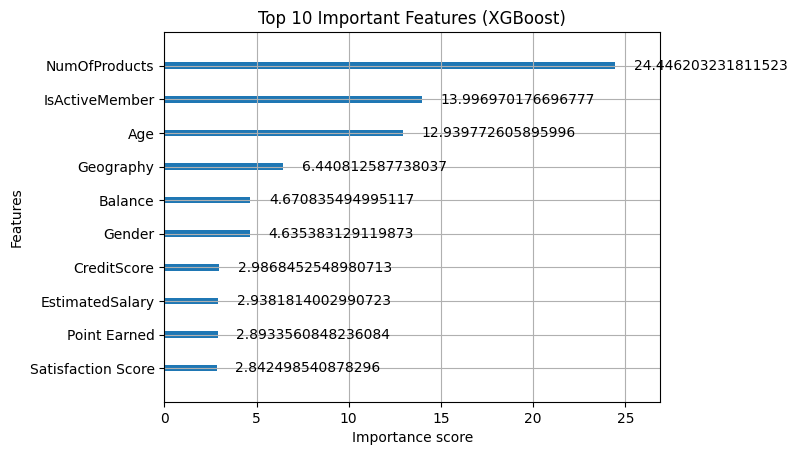

In [ ]:
import matplotlib.pyplot as plt
from xgboost import plot_importance

plt.figure(figsize=(10,6))
plot_importance(xgb_model, max_num_features=10, importance_type='gain')
plt.title("Top 10 Important Features (XGBoost)")
plt.show()

The variable importance graph shows the top ten features that impact the churn risk. As we can see ,number of products is top variable that drives the churn followed by the active member and age feature.

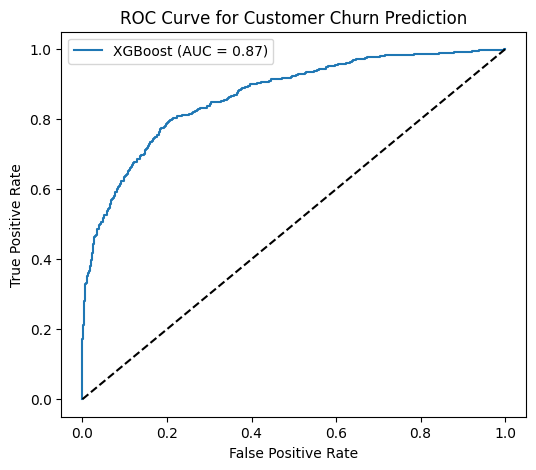

In [ ]:
from sklearn.metrics import roc_curve, auc

fpr, tpr, _ = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(6,5))
plt.plot(fpr, tpr, label=f'XGBoost (AUC = {roc_auc:.2f})')
plt.plot([0,1], [0,1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve for Customer Churn Prediction")
plt.legend()
plt.show()


ROC (Receiver Operating Characteristic) curve is a plot that shows how well your model separates the two classes (e.g., Churn vs No Churn) across all classification thresholds.

It plots:

True Positive Rate (TPR) = Recall = Sensitivity

False Positive Rate (FPR) = 1 - Specificity

AUC (Area Under Curve) is a single number summary of how well your model distinguishes between classes.


The AOC curve for bank customer churn is 0.87 with curve on the true positive rate depicting that there’s an 86.8% chance that the model is correctly ranking  a randomly chosen churned customer higher than a randomly chosen non-churned customer in terms of churn probability.